## Main Question

>**How does the distance to employment centers influence the level of nitrogen oxides (NOx) in the air?**

## Data Understanding

**1.0. What is the domain area of the dataset?**  
The dataset *boston.csv* contains information collected by the U.S Census Service concerning housing in the area of Boston Mass!  

**1.1. Under which circumstances was it collected?**  
t was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston)!  

**2.0. Which data format?**  
The format of the dataset is *.RDATA*!
But the dataset is converted then to the *.csv* format!    

**2.1. Do the files have headers or another file describing the data?**  
The files does have headers that describes the data! Each column has a name that describes the data it contains!  

**2.2. Are the data values separated by commas, semicolon, or tabs?**  
The data values are separated by commas!  
Example: *Somerville	-71.0677	42.2335	17.4	0.32264	0.0	21.89	0	0.624	5.942	93.5	1.9669	4	437	21.2	16.90	5238.464894*  

**3.0 How many features and how many observations does the dataset have?**  
The dataset has:  
* 17 features or columns!
* 480 observations or rows!  

**4.0 Does it contain numerical features? How many? What are the feature names?**  

**5.0. Does it contain categorical features?  How many? What are the feature names? Are they ordinal or nominal?**  



## Exploratory Data Analysis

In [22]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadr
import seaborn as sns

In [3]:
bostonRData = pyreadr.read_r("../Datasets/Boston_census_data.RData")

In [4]:
# Converting the 'bostonRData' to Pandas dataframe!
boston = bostonRData['Boston_census_data']

#### **Dataset's Features/Variables**  

**town**: District.  
**longitude**: Longitude coordinate.  
**latitude**: Latitude coordinate.  
**median_home_value**: Median home price (unit 1K USD).  
**crime_rate**: Crime (per 1000 inhabitants).  
**zoned_25k_p**: Proportion of the district's residential land intended for plots larger than 25000 square feet.  
**indust_p**: Proportion of acres owned by non-retail businesses.  
**borders_charles**: Charles River dummy variable (= 1 if the area borders the river, 0 otherwise).  
**NOx**: Concentration of nitrogen oxides (parts per 10 million).  
**n_rooms_avg**: Average number of rooms in owned residences.  
**before_1940_p**: Proportion of owned residences built before 1940.  
**employ_dist**: Weighted distance to five employment centers in Boston.  
**radial_access**: Index measuring access to city highways.  
**tax_rate**: Property tax per 10000 USD.  
**pupil_teacher_ratio**: Teacher density measured as student per teacher.  
**lower_stat_pct**: Percentage with low socioeconomic status in terms of education or work.  
**dist_fenway_park**: Distance to Fenway Park stadium.  

In [5]:
boston.head()

,town,longitude,latitude,median_home_value,crime_rate,zoned_25k_p,indust_p,borders_charles,NOx,n_rooms_avg,before_1940_p,employ_dist,radial_access,tax_rate,pupil_teacher_ratio,lower_stat_pct,dist_fenway_park
0,Somerville,-71.0677,42.2335,17.4,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,16.90,5238.464894
1,Weymouth,-70.9650,42.1503,18.7,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,9.29,16343.799411
2,Boston East Boston,-71.0215,42.2270,12.3,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666,20.2,24.56,9473.040432
3,Boston Forest Hills,-71.0511,42.1879,13.3,6.39312,0.0,18.10,0,0.584,6.162,97.4,2.2060,24,666,20.2,24.10,7692.103123
4,Boston Savin Hill,-71.0455,42.1768,14.4,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,18.71,8409.662136


In [6]:
# Basic statistics
boston.describe()

,longitude,latitude,median_home_value,crime_rate,zoned_25k_p,indust_p,borders_charles,NOx,n_rooms_avg,before_1940_p,employ_dist,radial_access,tax_rate,pupil_teacher_ratio,lower_stat_pct,dist_fenway_park
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,-71.054759,42.217420,21.574583,3.665260,10.754167,11.222500,0.060417,0.555703,6.241700,68.662917,3.797080,9.581250,409.327083,18.543333,12.951104,9589.095349
std,0.075269,0.062033,7.801398,8.746156,22.514875,6.814381,0.238506,0.116866,0.652402,28.065615,2.098213,8.724121,168.577653,2.108279,7.067785,5219.896130
min,-71.289500,42.030000,5.000000,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,1.980000,887.900669
25%,-71.091975,42.180925,16.675000,0.082973,0.000000,5.190000,0.000000,0.449000,5.879750,45.550000,2.109150,4.000000,280.750000,17.400000,7.385000,6127.044161
50%,-71.052300,42.219400,20.850000,0.253715,0.000000,9.690000,0.000000,0.538000,6.183500,77.500000,3.215700,5.000000,330.000000,19.100000,11.705000,8063.461374
75%,-71.016775,42.254500,24.525000,3.681942,12.500000,18.100000,0.000000,0.624000,6.569000,93.925000,5.116700,24.000000,666.000000,20.200000,17.127500,12365.269052
max,-70.810000,42.381000,48.800000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,33638.401055


In [7]:
print(f"Number of features in the dataset is {boston.shape[1]} and the number of observations/rows in the dataset is {boston.shape[0]}")

Number of features in the dataset is 17 and the number of observations/rows in the dataset is 480


#### **Checking missing values**

In [8]:
boston.isnull().sum()

town                   0
longitude              0
latitude               0
median_home_value      0
crime_rate             0
zoned_25k_p            0
indust_p               0
borders_charles        0
NOx                    0
n_rooms_avg            0
before_1940_p          0
employ_dist            0
radial_access          0
tax_rate               0
pupil_teacher_ratio    0
lower_stat_pct         0
dist_fenway_park       0
dtype: int64

In [9]:
boston.isna().sum()

town                   0
longitude              0
latitude               0
median_home_value      0
crime_rate             0
zoned_25k_p            0
indust_p               0
borders_charles        0
NOx                    0
n_rooms_avg            0
before_1940_p          0
employ_dist            0
radial_access          0
tax_rate               0
pupil_teacher_ratio    0
lower_stat_pct         0
dist_fenway_park       0
dtype: int64

#### **Correlation between variables**

In [18]:
# Correlation is only for numerical variables
boston_numerical_features =  boston[["longitude","latitude", "median_home_value", "crime_rate","zoned_25k_p", "indust_p", "NOx", "n_rooms_avg", 
                                   "before_1940_p", "employ_dist", "radial_access", "tax_rate", "pupil_teacher_ratio", "lower_stat_pct", "dist_fenway_park"]]

In [19]:
boston_numerical_features.head()

,longitude,latitude,median_home_value,crime_rate,zoned_25k_p,indust_p,NOx,n_rooms_avg,before_1940_p,employ_dist,radial_access,tax_rate,pupil_teacher_ratio,lower_stat_pct,dist_fenway_park
0,-71.0677,42.2335,17.4,0.32264,0.0,21.89,0.624,5.942,93.5,1.9669,4,437,21.2,16.90,5238.464894
1,-70.9650,42.1503,18.7,0.06151,0.0,5.19,0.515,5.968,58.5,4.8122,5,224,20.2,9.29,16343.799411
2,-71.0215,42.2270,12.3,7.99248,0.0,18.10,0.700,5.520,100.0,1.5331,24,666,20.2,24.56,9473.040432
3,-71.0511,42.1879,13.3,6.39312,0.0,18.10,0.584,6.162,97.4,2.2060,24,666,20.2,24.10,7692.103123
4,-71.0455,42.1768,14.4,9.51363,0.0,18.10,0.713,6.728,94.1,2.4961,24,666,20.2,18.71,8409.662136


In [ ]:
correlation_matrix = boston_numerical_features.corr()

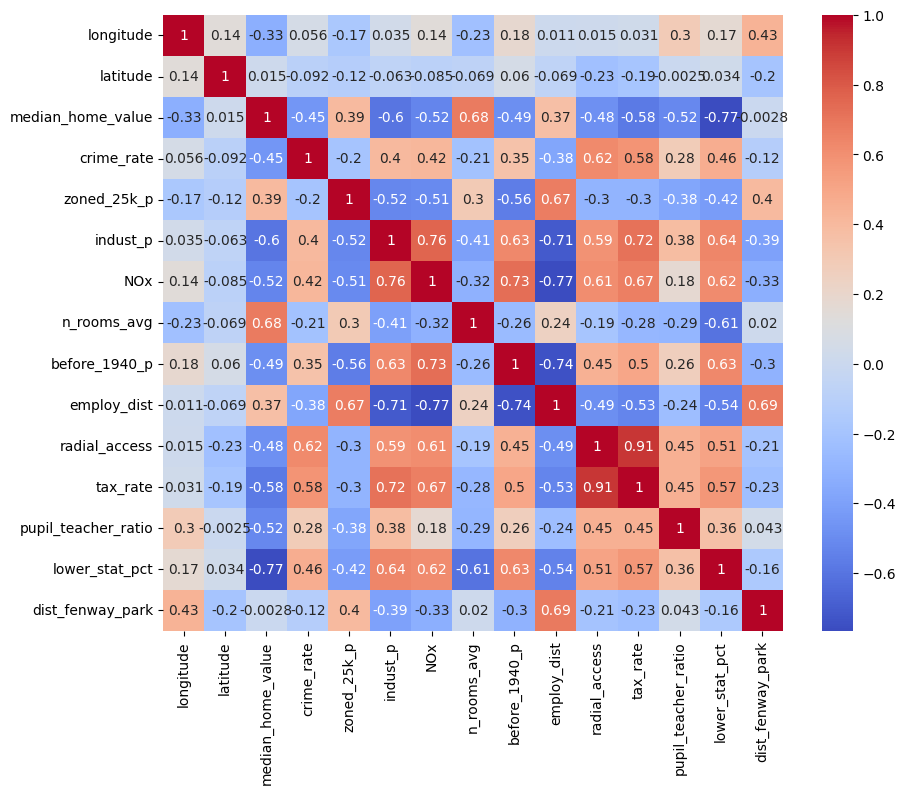

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

* The correlation coefficient between *employ_dist* and *NOx* is **-0.77** which indicates a **strong negative linear relationship** between these two variables!  
* A **Negative correlation** means that as one variable increases, the other decreases, and vice versa!   

#### **Assumptions:** 

> Linearity
* The relationship between the independent and dependent variable must be linear!  

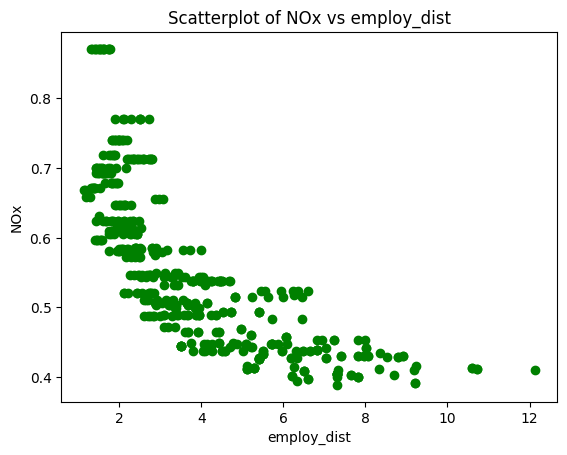

In [29]:
# Checking if the first assumption holds
plt.scatter(boston_numerical_features['employ_dist'], boston_numerical_features['NOx'], color='green')
plt.xlabel('employ_dist')
plt.ylabel('NOx')
plt.title('Scatterplot of NOx vs employ_dist')
plt.show()

* The Scatterplot shows that the association between these two is **more curvy than linear!**  
* The relationship between employ_dist and NOx is curvy, it must be straight for simple linear regression analysis!  